# A. Generate Random Data with Some Rules

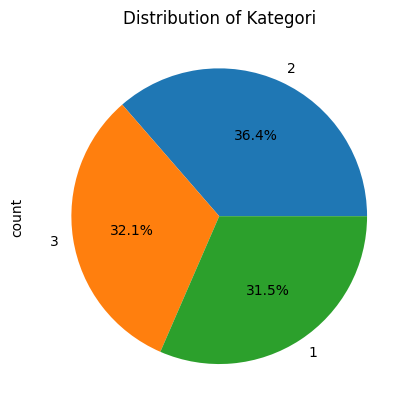

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random

data = pd.read_csv("sidoarjo.csv", delimiter=";")
data['kategori'] = data.apply(lambda x: random.randint(1, 3), axis=1)

kategori_counts = data['kategori'].value_counts()
kategori_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Kategori')
plt.show()

In [203]:
data = data.drop(columns=["tahun"])
kab_adm_sidoarjo = data[data["kabupaten"] == "SIDOARJO"]
kec_adm_tarik = data[data["kecamatan"] == "TARIK"]
kec_adm_prambon = data[data["kecamatan"] == "PRAMBON"]
kec_adm_krembung = data[data["kecamatan"] == "KREMBUNG"]
kec_adm_porong = data[data["kecamatan"] == "PORONG"]
kec_adm_jabon = data[data["kecamatan"] == "JABON"]
kec_adm_tanggulangin = data[data["kecamatan"] == "TANGGULANGIN"]
kec_adm_candi = data[data["kecamatan"] == "CANDI"]
kec_adm_tulangan = data[data["kecamatan"] == "TULANGAN"]
kec_adm_wonoayu = data[data["kecamatan"] == "WONOAYU"]
kec_adm_sukodono = data[data["kecamatan"] == "SUKODONO"]
kec_adm_sidoarjo = data[data["kecamatan"] == "SIDOARJO"]
kec_adm_buduran = data[data["kecamatan"] == "BUDURAN"]
kec_adm_sedati = data[data["kecamatan"] == "SEDATI"]
kec_adm_waru = data[data["kecamatan"] == "WARU"]
kec_adm_gedangan = data[data["kecamatan"] == "GEDANGAN"]
kec_adm_krian = data[data["kecamatan"] == "KRIAN"]
kec_adm_balongbendo = data[data["kecamatan"] == "BALONGBENDO"]

In [204]:
def generate_tps(data, suara_1, suara_2, suara_3, golput):
  kelurahan = data["kelurahan"].unique()
  kelurahan_tps = []
  for kel in kelurahan:
    kelurahan_tps.append({
      "kelurahan": kel,
      "jml_tps": random.randint(4, 7)
    })

  tps = []

  for kel in kelurahan_tps:
    for i in range(kel["jml_tps"]):
      tps.append({
          "kelurahan": kel["kelurahan"],
          "no_tps": i+1,
          "suara_1": 0,
          "suara_2": 0,
          "suara_3": 0,
          "golput": 0
      })

  random_suara_1 = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * suara_1).tolist()
  random_suara_2 = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * suara_2).tolist()
  random_suara_3 = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * suara_3).tolist()
  random_golput = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * golput).tolist()

  random_suara_1 = [round(i) for i in random_suara_1]
  random_suara_2 = [round(i) for i in random_suara_2]
  random_suara_3 = [round(i) for i in random_suara_3]
  random_golput = [round(i) for i in random_golput]

  for i in range(len(tps)):
    tps[i]["suara_1"] = random_suara_1[i]
    tps[i]["suara_2"] = random_suara_2[i]
    tps[i]["suara_3"] = random_suara_3[i]
    tps[i]["golput"] = random_golput[i]
  
  tps.append({
    "kelurahan": "TOTAL",
    "no_tps": sum([kel["jml_tps"] for kel in kelurahan_tps]),
    "suara_1": sum([t["suara_1"] for t in tps]),
    "suara_2": sum([t["suara_2"] for t in tps]),
    "suara_3": sum([t["suara_3"] for t in tps]),
    "golput": sum([t["golput"] for t in tps])
  })

  return pd.DataFrame(tps)

# Random data Kabupaten

In [205]:
# Data TPS beserta suara di Kab Sidoarjo
suara_1 = 373673
suara_2 = 387688
suara_3 = 212977
golput = 4257
data_suara_kab= generate_tps(kab_adm_sidoarjo, suara_1, suara_2, suara_3, golput)
data_suara_kab

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,MLIRIPROWO,1,48,3,34,1
1,MLIRIPROWO,2,299,109,28,1
2,MLIRIPROWO,3,31,376,301,8
3,MLIRIPROWO,4,95,289,124,0
4,MLIRIPROWO,5,133,2,78,4
...,...,...,...,...,...,...
1855,BAKUNGTEMENGGUNGAN,1,239,286,87,1
1856,BAKUNGTEMENGGUNGAN,2,110,681,468,1
1857,BAKUNGTEMENGGUNGAN,3,61,171,43,0
1858,BAKUNGTEMENGGUNGAN,4,111,45,371,0


In [206]:
# collect all data suara and remove total row from every data
data_suara = pd.concat([data_suara_kab])
data_suara = data_suara[data_suara["kelurahan"] != "TOTAL"]

total_row = pd.DataFrame([{
  "kabupaten": "TOTAL",
  "kecamatan": len(data["kecamatan"].unique()),
  "kelurahan": len(data_suara["kelurahan"].unique()),
  "no_tps": len(data_suara["kelurahan"].unique()) * len(data_suara["no_tps"].unique()),
  "suara_1": data_suara["suara_1"].sum(),
  "suara_2": data_suara["suara_2"].sum(),
  "suara_3": data_suara["suara_3"].sum(),
  "golput": data_suara["golput"].sum()
}])

# concat data suara with data 
completed_data_kab = pd.merge(data, data_suara, on="kelurahan", how="outer")
completed_data_kab = pd.concat([completed_data_kab, total_row], ignore_index=True)

# Random data Kecamatan

In [207]:
# Data TPS beserta suara di Kec Tarik
suara_1 = 20409
suara_2 = 7850
suara_3 = 10789
golput = 203
data_suara_tarik= generate_tps(kec_adm_tarik, suara_1, suara_2, suara_3, golput)
data_suara_tarik

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,MLIRIPROWO,1,36,29,20,0
1,MLIRIPROWO,2,39,49,116,0
2,MLIRIPROWO,3,25,49,308,4
3,MLIRIPROWO,4,191,35,60,3
4,MLIRIPROWO,5,653,35,8,2
...,...,...,...,...,...,...
99,KEDINDING,4,320,27,28,2
100,KEDINDING,5,359,104,5,0
101,KEDINDING,6,66,64,342,0
102,KEDINDING,7,388,129,241,1


In [208]:
# Data TPS beserta suara di Kec Prambon
suara_1 = 14442
suara_2 = 18059
suara_3 = 11328
golput = 186
data_suara_prambon= generate_tps(kec_adm_prambon, suara_1, suara_2, suara_3, golput)
data_suara_prambon

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PRAMBON,1,45,169,11,6
1,PRAMBON,2,21,17,42,1
2,PRAMBON,3,22,114,616,1
3,PRAMBON,4,58,207,75,1
4,PRAMBON,5,143,182,57,0
...,...,...,...,...,...,...
99,WATUTULIS,2,47,91,207,1
100,WATUTULIS,3,123,195,61,8
101,WATUTULIS,4,182,404,552,6
102,WATUTULIS,5,238,362,4,4


In [209]:
# Data TPS beserta suara di Kec Krembung
suara_1 = 14118
suara_2 = 18025
suara_3 = 8905
golput = 163
data_suara_krembung= generate_tps(kec_adm_krembung, suara_1, suara_2, suara_3, golput)
data_suara_krembung

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,TAMBAKREJO,1,43,125,20,2
1,TAMBAKREJO,2,164,45,80,2
2,TAMBAKREJO,3,85,36,342,7
3,TAMBAKREJO,4,148,26,11,2
4,TAMBAKREJO,5,68,234,113,0
...,...,...,...,...,...,...
93,BALONGGARUT,1,46,204,62,2
94,BALONGGARUT,2,17,83,17,1
95,BALONGGARUT,3,132,63,18,1
96,BALONGGARUT,4,117,198,51,1


In [210]:
# Data TPS beserta suara di Kec Porong
suara_1 = 12708
suara_2 = 14267
suara_3 = 8909
golput = 187
data_suara_porong= generate_tps(kec_adm_porong, suara_1, suara_2, suara_3, golput)
data_suara_porong

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PORONG,1,85,7,72,7
1,PORONG,2,138,183,78,2
2,PORONG,3,18,148,4,4
3,PORONG,4,24,78,148,0
4,PORONG,5,255,3,53,1
...,...,...,...,...,...,...
87,PESAWAHAN,3,32,14,34,6
88,PESAWAHAN,4,15,242,171,3
89,PESAWAHAN,5,5,210,349,3
90,PESAWAHAN,6,97,324,50,1


In [211]:
# Data TPS beserta suara di Kec Jabon
suara_1 = 13805
suara_2 = 12243
suara_3 = 5720
golput = 176
data_suara_jabon= generate_tps(kec_adm_jabon, suara_1, suara_2, suara_3, golput)
data_suara_jabon

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PANGGREH,1,823,47,7,3
1,PANGGREH,2,21,331,53,1
2,PANGGREH,3,25,244,215,1
3,PANGGREH,4,72,24,19,1
4,PANGGREH,5,1,58,6,0
...,...,...,...,...,...,...
78,PERMISAN,2,38,9,57,0
79,PERMISAN,3,242,83,14,0
80,PERMISAN,4,308,55,31,0
81,PERMISAN,5,52,276,97,3


In [213]:
# collect all data suara and remove total row from every data
data_suara = pd.concat([data_suara_tarik, data_suara_prambon, data_suara_krembung, data_suara_porong, data_suara_jabon])
data_suara = data_suara[data_suara["kelurahan"] != "TOTAL"]

total_row = pd.DataFrame([{
  "kabupaten": "TOTAL",
  "kecamatan": len(data["kecamatan"].unique()),
  "kelurahan": len(data_suara["kelurahan"].unique()),
  "no_tps": len(data_suara["kelurahan"].unique()) * len(data_suara["no_tps"].unique()),
  "suara_1": data_suara["suara_1"].sum(),
  "suara_2": data_suara["suara_2"].sum(),
  "suara_3": data_suara["suara_3"].sum(),
  "golput": data_suara["golput"].sum()
}])

# concat data suara with data 
completed_data_kec = pd.merge(data, data_suara, on="kelurahan", how="outer")
completed_data_kec = pd.concat([completed_data_kec, total_row], ignore_index=True)

# B. Menghitung estimasi parameter dan selisih proporsi dengan parameter menggunakan metode random sampling DAN 2 stage

In [214]:
# estimasi parameter
estimation_parameter_data = []

for i in range(1, 20):  
  random_sampling = completed_data_kec.sample(frac=i/20, random_state=42).reset_index(drop=True)

  # sum all suara_1, suara_2, and golput
  suara_1 = random_sampling["suara_1"].sum()
  suara_2 = random_sampling["suara_2"].sum()
  suara_3 = random_sampling["suara_3"].sum()
  golput = random_sampling["golput"].sum()

  # calculate percentage of suara_1, suara_2, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i/20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,35.671947,43.474512,20.368574,0.484966
1,10,39.509692,39.939878,20.006220,0.544211
2,15,38.556903,37.131372,23.784752,0.526974
3,20,36.533502,39.557686,23.380857,0.527955
4,25,39.457999,38.035473,22.027550,0.478977
...,...,...,...,...,...
14,75,38.565080,37.185664,23.774552,0.474705
15,80,38.636837,37.409091,23.484034,0.470037
16,85,38.937034,37.201945,23.392223,0.468798
17,90,39.030513,37.165977,23.336019,0.467490


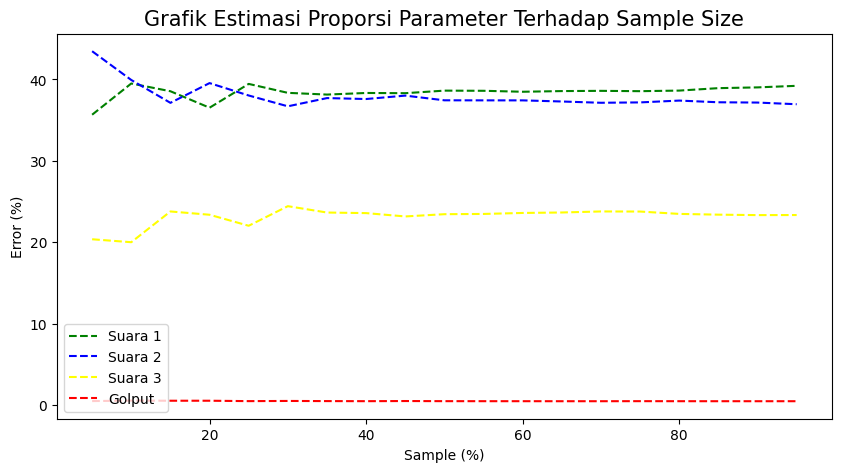

In [215]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label="Suara 1", color="green", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label="Suara 2", color="blue", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label="Suara 3", color="yellow", linestyle="dashed")
plt.plot(x, estimation_parameter_data["golput"], label="Golput", color="red", linestyle="dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size=15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [216]:
kab = (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())
kec = (completed_data_kec["suara_1"].sum() + completed_data_kec["suara_2"].sum() + completed_data_kec["suara_3"].sum() + completed_data_kec["golput"].sum())

perbandingan = kab/kec
print(perbandingan)

4.929942924117146


In [218]:
# hitung eror estimasi parameter suara_1, suara_2, dan golput terhadap total_suara_1_provinsi, total_suara_2_provinsi, dan total_golput_provinsi
percentage_suara_1_kabupaten = (completed_data_kec["suara_1"].sum() * perbandingan / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100  
percentage_suara_2_kabupaten = (completed_data_kec["suara_2"].sum() * perbandingan  / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 
percentage_suara_3_kabupaten = (completed_data_kec["suara_3"].sum() * perbandingan / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 
percentage_golput_kabupaten = (completed_data_kec["golput"].sum() * perbandingan / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100*(estimation_parameter_data["suara_1"]-percentage_suara_1_kabupaten)/percentage_suara_1_kabupaten)
error_suara_2 = abs(100*(estimation_parameter_data["suara_2"]-percentage_suara_2_kabupaten)/percentage_suara_2_kabupaten)
error_suara_3 = abs(100*(estimation_parameter_data["suara_3"]-percentage_suara_3_kabupaten)/percentage_suara_3_kabupaten)
error_golput = abs(100*(estimation_parameter_data["golput"]-percentage_golput_kabupaten)/percentage_golput_kabupaten)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
  "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,8.973037,17.658116,12.917714,2.796098
1,10,0.820044,8.092086,14.466898,15.353908
2,15,1.611265,0.491230,1.687556,11.700254
3,20,6.774539,7.057734,0.039223,11.908241
4,25,0.688135,2.938063,5.825052,1.526672
...,...,...,...,...,...
14,75,1.590400,0.638165,1.643950,0.621019
15,80,1.407290,1.242842,0.401891,0.368308
16,85,0.641255,0.682227,0.009370,0.630944
17,90,0.402715,0.584885,0.230920,0.908209


<Figure size 1000x500 with 0 Axes>

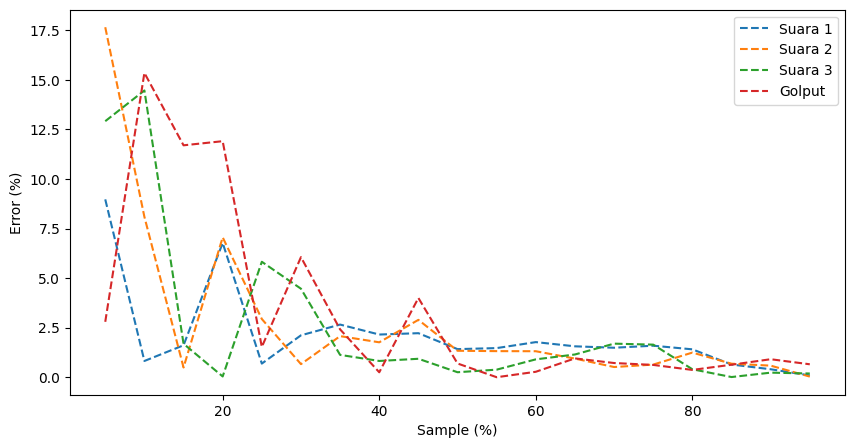

In [219]:
# display estimation persentase error of proportion
fig = plt.figure(figsize=(10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize=(10, 5))
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_1"], label="Suara 1", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_2"], label="Suara 2", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_3"], label="Suara 3", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_golput"], label="Golput", linestyle="dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

# Random data Kelurahan

In [220]:
kel_adm_mliriprowo = kec_adm_tarik[kec_adm_tarik["kelurahan"] == "MLIRIPROWO"]
kel_adm_kedungbocok = kec_adm_tarik[kec_adm_tarik["kelurahan"] == "KEDUNGBOCOK"]
kel_adm_singogalih = kec_adm_tarik[kec_adm_tarik["kelurahan"] == "SINGOGALIH"]
kel_adm_margosari = kec_adm_tarik[kec_adm_tarik["kelurahan"] == "MERGOSARI"]

In [221]:
# Data TPS beserta suara di Kec Mliriprowo
suara_1 = 1022
suara_2 = 299
suara_3 = 761
golput = 12
data_suara_mliriprowo= generate_tps(kel_adm_mliriprowo, suara_1, suara_2, suara_3, golput)
data_suara_mliriprowo

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,MLIRIPROWO,1,135,75,130,2
1,MLIRIPROWO,2,39,138,289,1
2,MLIRIPROWO,3,311,23,92,3
3,MLIRIPROWO,4,15,13,26,1
4,MLIRIPROWO,5,288,4,84,4
5,MLIRIPROWO,6,233,47,140,1
6,TOTAL,6,1021,300,761,12


In [222]:
# Data TPS beserta suara di Kec kedungbocok
suara_1 = 626
suara_2 = 484
suara_3 = 939
golput = 10
data_suara_kedungbocok= generate_tps(kel_adm_kedungbocok, suara_1, suara_2, suara_3, golput)
data_suara_kedungbocok

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,KEDUNGBOCOK,1,53,50,434,3
1,KEDUNGBOCOK,2,8,46,345,3
2,KEDUNGBOCOK,3,102,322,71,1
3,KEDUNGBOCOK,4,156,0,15,1
4,KEDUNGBOCOK,5,308,65,74,3
5,TOTAL,5,627,483,939,11


In [223]:
# Data TPS beserta suara di Kec Singogalih
suara_1 = 1007
suara_2 = 1202
suara_3 = 587
golput = 9
data_suara_singogalih= generate_tps(kel_adm_singogalih, suara_1, suara_2, suara_3, golput)
data_suara_singogalih

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,SINGOGALIH,1,320,331,200,2
1,SINGOGALIH,2,317,743,123,3
2,SINGOGALIH,3,295,37,65,4
3,SINGOGALIH,4,75,91,199,0
4,TOTAL,4,1007,1202,587,9


In [224]:
# Data TPS beserta suara di Kec Margosari
suara_1 = 956
suara_2 = 583
suara_3 = 457
golput = 13
data_suara_margosari= generate_tps(kel_adm_margosari, suara_1, suara_2, suara_3, golput)
data_suara_margosari

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,MERGOSARI,1,127,0,35,2
1,MERGOSARI,2,187,222,124,2
2,MERGOSARI,3,62,9,25,4
3,MERGOSARI,4,130,124,214,2
4,MERGOSARI,5,196,98,33,3
5,MERGOSARI,6,9,22,19,0
6,MERGOSARI,7,245,108,6,0
7,TOTAL,7,956,583,456,13


In [225]:
# collect all data suara and remove total row from every data
data_suara = pd.concat([data_suara_mliriprowo, data_suara_margosari, data_suara_singogalih, data_suara_kedungbocok])
data_suara = data_suara[data_suara["kelurahan"] != "TOTAL"]

total_row = pd.DataFrame([{
  "kabupaten": "TOTAL",
  "kecamatan": len(data["kecamatan"].unique()),
  "kelurahan": len(data_suara["kelurahan"].unique()),
  "no_tps": len(data_suara["kelurahan"].unique()) * len(data_suara["no_tps"].unique()),
  "suara_1": data_suara["suara_1"].sum(),
  "suara_2": data_suara["suara_2"].sum(),
  "suara_3": data_suara["suara_3"].sum(),
  "golput": data_suara["golput"].sum()
}])

# concat data suara with data 
completed_data_kel = pd.merge(data, data_suara, on="kelurahan", how="outer")
completed_data_kel = pd.concat([completed_data_kel, total_row], ignore_index=True)

# C. Menghitung estimasi parameter dan selisih proporsi dengan parameter menggunakan metode random sampling dan 3 stage

In [226]:
# estimasi parameter
estimation_parameter_data = []

for i in range(1, 20):  
  random_sampling = completed_data_kec.sample(frac=i/20, random_state=42).reset_index(drop=True)

  # sum all suara_1, suara_2, and golput
  suara_1 = random_sampling["suara_1"].sum()
  suara_2 = random_sampling["suara_2"].sum()
  suara_3 = random_sampling["suara_3"].sum()
  golput = random_sampling["golput"].sum()

  # calculate percentage of suara_1, suara_2, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i/20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,35.671947,43.474512,20.368574,0.484966
1,10,39.509692,39.939878,20.006220,0.544211
2,15,38.556903,37.131372,23.784752,0.526974
3,20,36.533502,39.557686,23.380857,0.527955
4,25,39.457999,38.035473,22.027550,0.478977
...,...,...,...,...,...
14,75,38.565080,37.185664,23.774552,0.474705
15,80,38.636837,37.409091,23.484034,0.470037
16,85,38.937034,37.201945,23.392223,0.468798
17,90,39.030513,37.165977,23.336019,0.467490


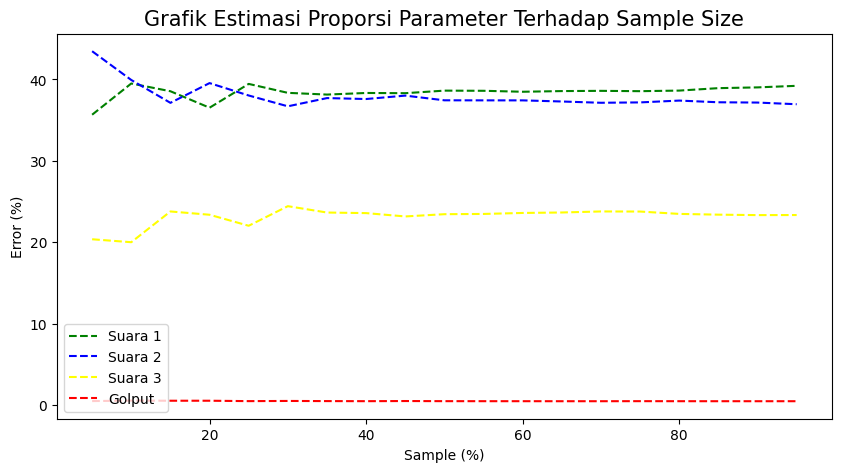

In [227]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label="Suara 1", color="green", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label="Suara 2", color="blue", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label="Suara 3", color="yellow", linestyle="dashed")
plt.plot(x, estimation_parameter_data["golput"], label="Golput", color="red", linestyle="dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size=15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [229]:
kel = (completed_data_kel["suara_1"].sum() + completed_data_kel["suara_2"].sum() + completed_data_kel["suara_3"].sum() + completed_data_kel["golput"].sum())

perbandingan2 = kab/kel
print(perbandingan2)

111.64146314263411


In [230]:
# hitung eror estimasi parameter suara_1, suara_2, dan golput terhadap total_suara_1_provinsi, total_suara_2_provinsi, dan total_golput_provinsi
percentage_suara_1_kabupaten = (completed_data_kel["suara_1"].sum() * perbandingan2 / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100  
percentage_suara_2_kabupaten = (completed_data_kel["suara_2"].sum() * perbandingan2  / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 
percentage_suara_3_kabupaten = (completed_data_kel["suara_3"].sum() * perbandingan2 / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 
percentage_golput_kabupaten = (completed_data_kel["golput"].sum() * perbandingan2 / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100*(estimation_parameter_data["suara_1"]-percentage_suara_1_kabupaten)/percentage_suara_1_kabupaten)
error_suara_2 = abs(100*(estimation_parameter_data["suara_2"]-percentage_suara_2_kabupaten)/percentage_suara_2_kabupaten)
error_suara_3 = abs(100*(estimation_parameter_data["suara_3"]-percentage_suara_3_kabupaten)/percentage_suara_3_kabupaten)
error_golput = abs(100*(estimation_parameter_data["golput"]-percentage_golput_kabupaten)/percentage_golput_kabupaten)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
  "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,11.417792,51.805277,33.414143,3.362431
1,10,1.887729,39.462961,34.598698,8.443039
2,15,4.253739,29.656157,22.246494,5.008276
3,20,9.278340,38.128414,23.566844,5.203802
4,25,2.016095,32.813118,27.990870,4.555806
...,...,...,...,...,...
14,75,4.233435,29.845735,22.279836,5.407200
15,80,4.055242,30.625904,23.229554,6.337257
16,85,3.309781,29.902585,23.529688,6.584158
17,90,3.077648,29.776992,23.713421,6.844812


<Figure size 1000x500 with 0 Axes>

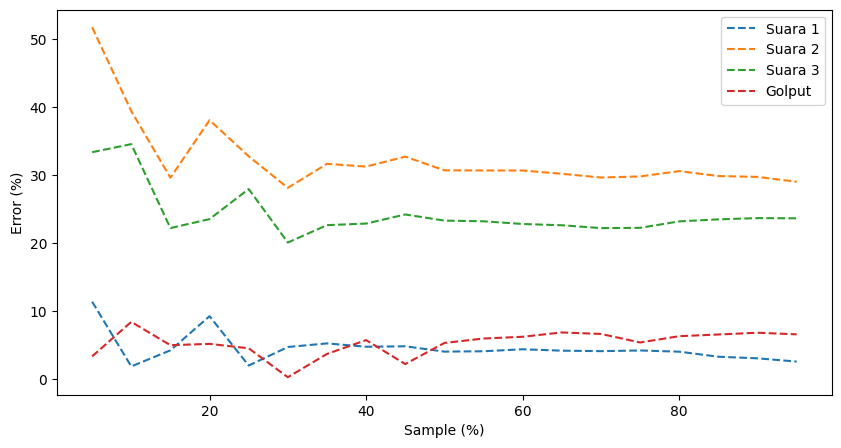

In [231]:
# display estimation persentase error of proportion
fig = plt.figure(figsize=(10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize=(10, 5))
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_1"], label="Suara 1", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_2"], label="Suara 2", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_3"], label="Suara 3", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_golput"], label="Golput", linestyle="dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()